<a href="https://colab.research.google.com/github/manasa0551/Credit-Card-Segmentation/blob/main/Credit_Card_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a Model that estimates Credit card uasage and segmentation of customers into different credit card categories by using K-means algorithm with the K value determined by using Wcss and Silhouette score also used PCA for dimension reduction for better visualization.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
# Importing data set
df_cc = pd.read_csv('CC_GENERAL.csv')
df_cc.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Getting insights regarding the data
df_cc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# getting description about rows and columns
df_cc.shape

(8950, 18)

In [6]:
# checking insights of the data
df_cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# checking for null values
df_cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# filling the null values with mean
df_cc['CREDIT_LIMIT'].fillna(df_cc['CREDIT_LIMIT'].mean(), inplace=True)
df_cc['MINIMUM_PAYMENTS'].fillna(df_cc['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [9]:
# checking for null values after filling with mean
df_cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
# Droping the CUSTID bec of object data type
df_cc.drop('CUST_ID', axis=1, inplace=True)
df_cc.head(5)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
# Data Normalization
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_cc) 

In [12]:
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 


Applying PCA

In [14]:
normalized_df.shape

(8950, 17)

In [15]:
#We have 17 features so our n_component will be 17.
pc=PCA(n_components=17)
cr_pca=pc.fit(normalized_df)

In [16]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

1.0

In [17]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(normalized_df)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [18]:
var_ratio

{2: 0.4743192439946695,
 3: 0.5845854672360666,
 4: 0.6847394539247921,
 5: 0.7554064119626972,
 6: 0.8126204101678516,
 7: 0.8635425031875765,
 8: 0.8974633743270077,
 9: 0.9243716202533614,
 10: 0.9450988000495755,
 11: 0.9580143227477981,
 12: 0.9703093121163604,
 13: 0.9810499906852155,
 14: 0.9902200175770933,
 15: 0.9968828121511267,
 16: 0.9999988052854876,
 17: 1.0}

From the above data we can infer that more than 5 components are showing about 90% variance so we select 5 components

In [19]:
pc=PCA(n_components=6)

In [20]:
p=pc.fit(normalized_df)

In [21]:
normalized_df.shape

(8950, 17)

In [22]:
p.explained_variance_

array([0.28409283, 0.1799108 , 0.10786813, 0.09797581, 0.06913008,
       0.05596969])

In [23]:
np.sum(p.explained_variance_)

0.7949473447285084

In [24]:
var_ratio

{2: 0.4743192439946695,
 3: 0.5845854672360666,
 4: 0.6847394539247921,
 5: 0.7554064119626972,
 6: 0.8126204101678516,
 7: 0.8635425031875765,
 8: 0.8974633743270077,
 9: 0.9243716202533614,
 10: 0.9450988000495755,
 11: 0.9580143227477981,
 12: 0.9703093121163604,
 13: 0.9810499906852155,
 14: 0.9902200175770933,
 15: 0.9968828121511267,
 16: 0.9999988052854876,
 17: 1.0}

In [27]:
# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf, linewidth=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

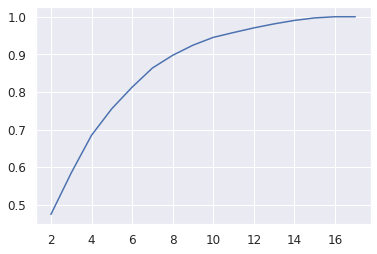

In [28]:
pd.Series(var_ratio).plot()

In [ ]:
# As 5 components are showing about 90% of variance

In [44]:
# Taking 3 as the n_components 
pc_final=PCA(n_components=3).fit(normalized_df)

reduced_cr=pc_final.fit_transform(normalized_df)

In [45]:
dd=pd.DataFrame(reduced_cr)

In [46]:
dd.head(5)


,0,1,2
0,-0.489826,-0.679679,-0.097457
1,-0.518791,0.545011,0.196407
2,0.330885,0.268977,0.115879
3,-0.482374,-0.092112,0.453703
4,-0.563289,-0.481915,-0.256498


In [47]:
dd.shape

(8950, 3)

17 columns have been reduced to 3 columns by PCA method

Clustering

In [58]:
# Finding WCSS value for different number of clusters
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dd)

    wcss.append(kmeans.inertia_)



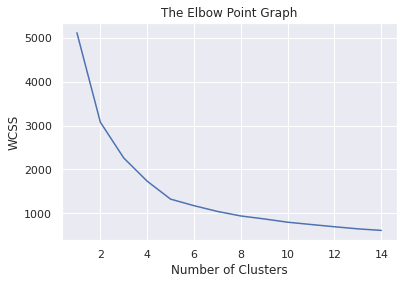

In [59]:
# plot an elbow graph
sns.set()
plt.plot(range(1,15), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(dd)

print(Y)

[0 1 2 0 0 2 2 2 0 0 2 0 2 2 0 1 1 0 2 2 2 2 2 1 1 2 1 2 1 0 1 2 1 2 2 0 1 2 1 1 0 1 0 0 2 0 0 1 2 0 1 2 0 2 0 0 1 2 1 1 0 0 1 0 2 0 0 1 2 0 2 1 0 0 0 2 2 2 0 1 2 0 0 0 2 2 1 1 1 1 2 1 0 0 0 0 2 1 0 0 0 2 2 2 0 1 2 1 2 1 2 1 2 1 2 2 2 1 0 1 2 0 2 1 1 2 0 2 1 0 0 2 0 1 2 0 2 2 2 2 0 0 1 1 2 1 2 0 2 2 1 2 2 2 2 2 1 0 2 0 1 1 2 0 2 1 2 2 2 2 1 2 0 1 2 0 1 1 2 0 2 0 1 0 2 2 1 2 0 0 0 0 0 2 1 2 2 2 0 1 0 1 2 1 2 0 1 1 1 0 1 1 0 2 0 0 2 0 1 2 2 2 0 2 1 0 2 2 0 2 2 2 2 0 2 2 1 1 0 0 1 2 2 0 2 0 2 2 1 2 1 2 0 2 1 0 0 2 2 0 1 2 2 2 2 2 2 2 0 2 2 1 2 2 1 0 0 0 2 2 1 2 2 2 0 1 0 1 0 1 2 1 1 1 2 2 1 1 2 2 1 2 1 2 1 2 2 2 0 2 2 2 2 0 1 0 1 2 2 2 1 1 1 0 1 2 2 2 1 2 0 2 2 2 1 1 0 2 0 2 0 1 0 0 2 0 2 2 1 2 1 2 1 0 0 2 2 1 0 0 2 0 2 1 0 2 0 2 1 1 2 2 0 2 2 0 2 2 0 0 1 0 1 0 2 0 0 1 2 0 0 2 0 2 0 1 2 0 1 2 2 2 1 2 1 1 0 0 1 2 0 2 0 1 2 2 1 2 2 2 2 0 1 2 2 1 1 0 1 1 1 1 0 1 0 1 2 2 0 1 0 1 0 2 2 1 2 0 0 0 2 2 2 1 2 2 2 2 0 2 2 2 2 2 0 1 2 2 2 0 1 1 2 0 0 1 2 2 1 0 0 2 1 0 2 2 1 2 1 2 2 1 2 0 2 1 1 1 2 2

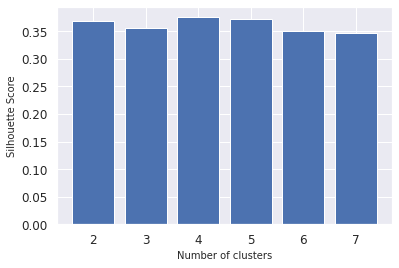

In [49]:
# it is hard to find the elbow point of the curve, so using Silhouette score.
# Silhouette score method to calculate silhouette coefficient and to find exact numbr of k.
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(dd, KMeans(n_clusters = n_cluster).fit_predict(dd))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 


In [50]:
# Assigning the highest Silhouette score 3 to the Kmeans model
kmean= KMeans(3)
kmean.fit(scaled_df)
labels=kmean.labels_


In [51]:
clusters=pd.concat([df_cc, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


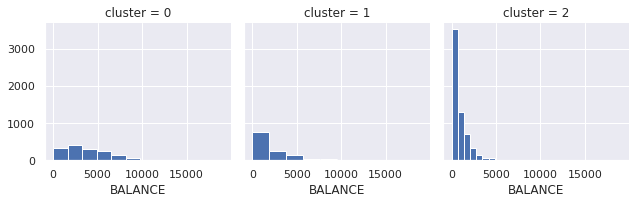

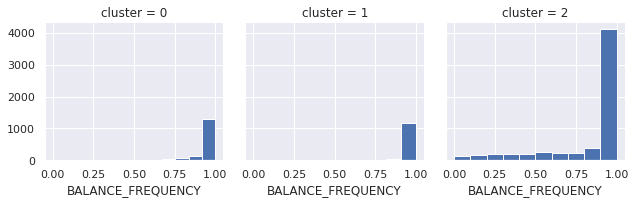

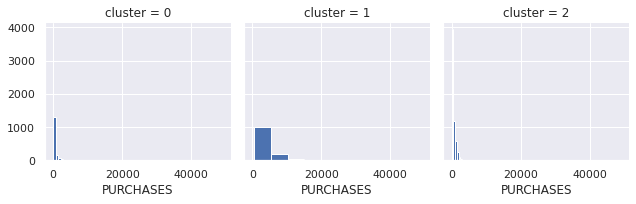

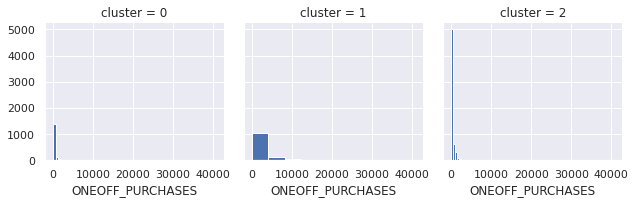

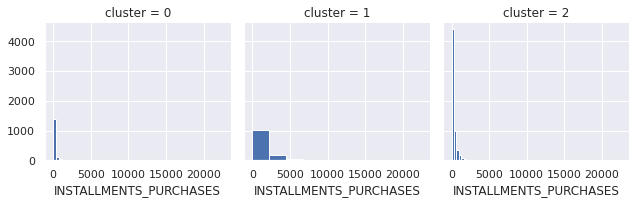

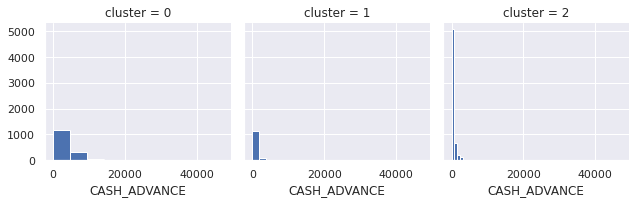

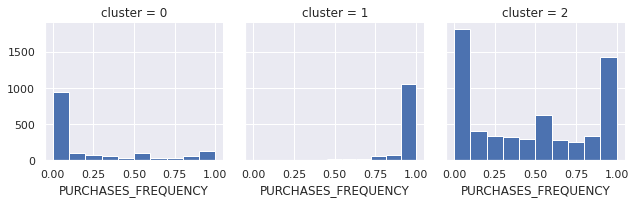

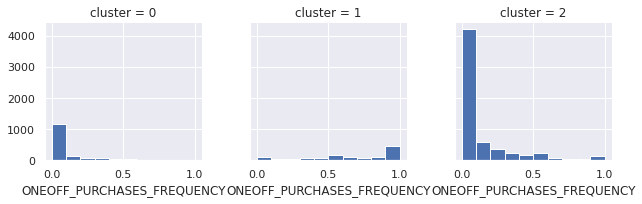

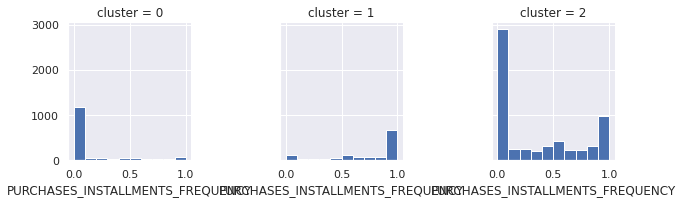

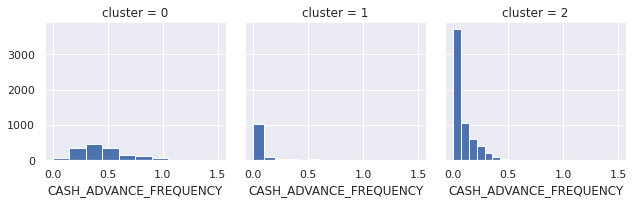

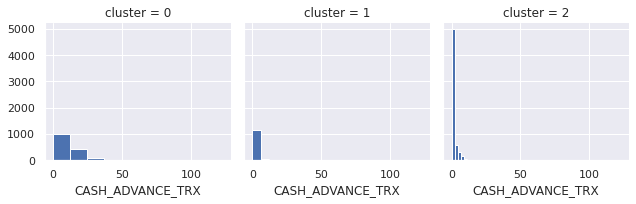

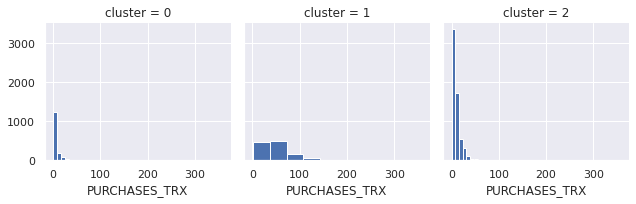

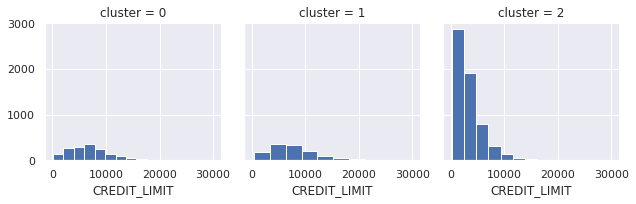

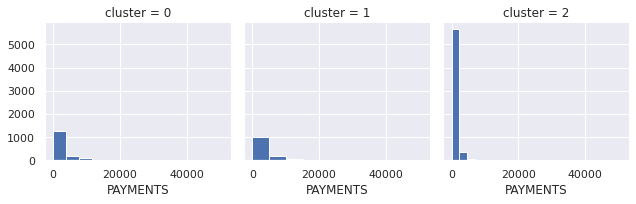

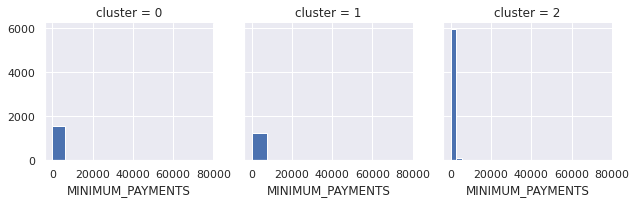

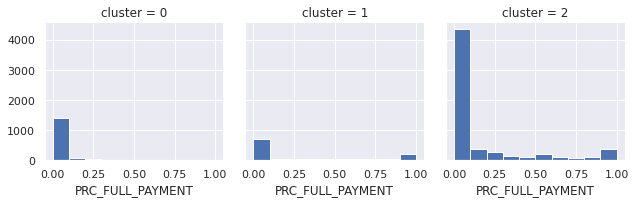

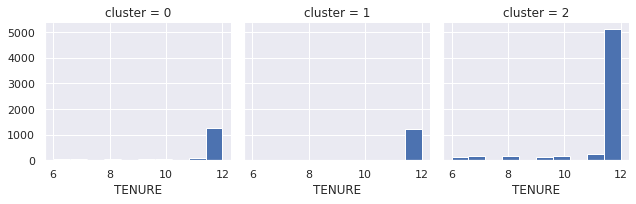

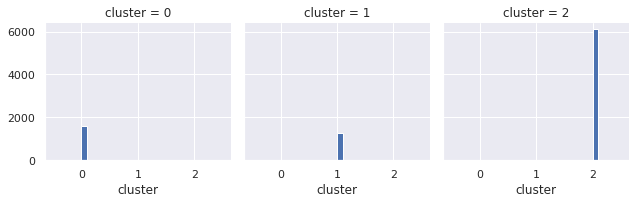

In [63]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)


In [52]:
# Getting total counts of the cluster 
clusters['cluster'].value_counts()

2    6108
0    1590
1    1252
Name: cluster, dtype: int64

In [54]:
clusters.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,3990.839154,0.957822,384.756151,249.255119,135.578811,3880.817980,0.232119,0.111099,0.144000,0.448392,12.426415,5.579245,6691.260720,3023.736154,1754.838260,0.033902,11.348428
1,2201.291863,0.981438,4233.264673,2697.113235,1536.630671,456.221905,0.948701,0.668460,0.740132,0.062896,1.525559,56.141374,7683.266773,4120.165870,1239.971672,0.300279,11.916933
2,802.324499,0.834950,502.107664,250.362322,252.066717,330.583831,0.463621,0.130720,0.344812,0.068410,1.212999,8.594139,3268.953509,907.899365,555.339094,0.154861,11.479371


In [55]:
# Putting the PCA components into Dataframe
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2' , 'principal component 3'])
principalDf.head(2)


,principal component 1,principal component 2,principal component 3
0,-0.489826,-0.679678,-0.097458
1,-0.518791,0.545008,0.196406


In [56]:
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':labels})], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,cluster
0,-0.489826,-0.679678,-0.097458,2
1,-0.518791,0.545008,0.196406,0
2,0.330885,0.268980,0.115884,2
3,-0.482374,-0.092110,0.453706,2
4,-0.563289,-0.481915,-0.256500,2


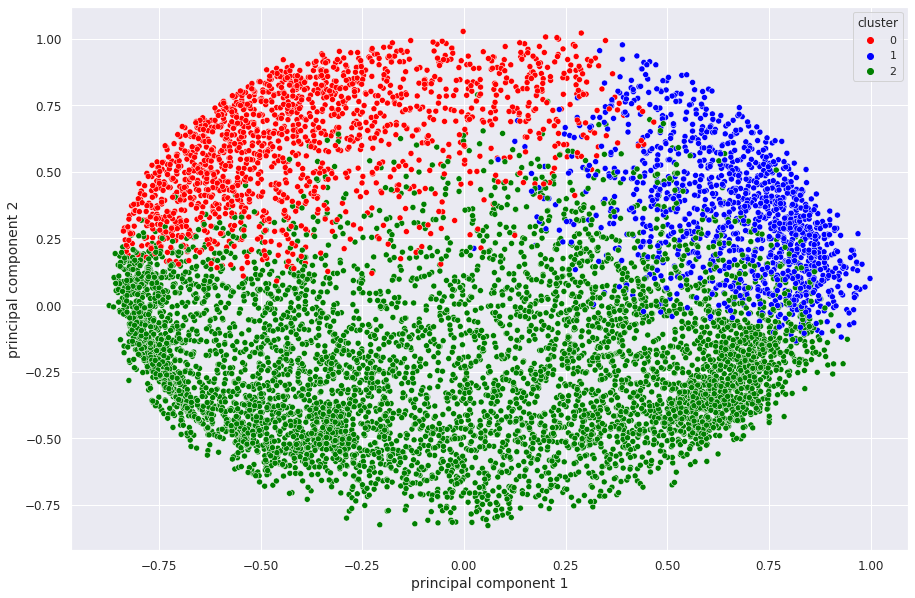

In [57]:
# Visualizatio of Clusters
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf,palette=['red','blue','green'])
plt.show()


Conclusions:
Cluster 0
-Balance           : Low
-Balance Frequency : Medium
-Purchase          : High
-Purchase Frequency: low
-Cash Advance      : Low
-Minimum Payment   : Low
-Credit Limit      : low

In [ ]:
# Cluster 0 :
# -small group of customers with low balances,medium purchase with lowest credit limit
## - can recommend Silver credit card(bec of low credit limit) 

Conclusions: Cluster 1
 -Balance : Low 
 -Balance Frequency : low
 -Purchase : Medium 
 -Purchase Frequency: Medium
 -Cash Advance : Medium
 -Minimum Payment : Low 
 -Credit Limit : Medium

In [ ]:
# Cluster 1:
# -small group of customers with low balance with low purchase with medium credit limit
## - Can recommend Gold Credit Card(bec of regular monthly income,limit is large enough)

Conclusions: Cluster 2 -Balance : High -Balance Frequency : High 
-Purchase : Medium
-Purchase Frequency: High
-Cash Advance : High
-Minimum Payment : High 
-Credit Limit : High

In [ ]:
# Cluster 2:
# -Large group of customers with high balances and medium purchase with high credit limit
## - Can recommend Platinum Credit Card with highest credit limit